In [1]:
import vipy

In [2]:
# Generate a random scene with 32 tracked objects and 32 activities
v = vipy.video.RandomScene()

In [3]:
# Visualize the activities in this video by generating an annotation video and playing with the system player
v.show()

[vipy.video.annotate]: Annotating video ...
[vipy.video.play]: Executing "ffplay /Users/jba3139/.vipy/d8b4098f27f801f1.mp4"


<vipy.video.scene: filename="/Users/jba3139/.vipy/d8b4098f27f801f1.mp4", category="scene", objects=32, activities=32>

In [4]:
# The activities areavailable as a mutable dictionary keyed by a globally unique activity ID
# The activity is defined over a contiguous start and end frame range, and is associated with one or more tracks
# that are involved with this activity during this time frame
v.activities()

{'6e1dfe468ee111ea87818c8590cb2989': <vipy.activity: category="activity0", frames=(54,127), tracks=1>,
 '6e1e0a9e8ee111ea87818c8590cb2989': <vipy.activity: category="activity1", frames=(95,108), tracks=1>,
 '6e1e25928ee111ea87818c8590cb2989': <vipy.activity: category="activity2", frames=(85,119), tracks=1>,
 '6e1e5a628ee111ea87818c8590cb2989': <vipy.activity: category="activity3", frames=(59,130), tracks=1>,
 '6e1e87e48ee111ea87818c8590cb2989': <vipy.activity: category="activity4", frames=(55,117), tracks=1>,
 '6e1eb1248ee111ea87818c8590cb2989': <vipy.activity: category="activity5", frames=(50,101), tracks=1>,
 '6e1ee4fa8ee111ea87818c8590cb2989': <vipy.activity: category="activity6", frames=(57,126), tracks=1>,
 '6e1f0e1c8ee111ea87818c8590cb2989': <vipy.activity: category="activity7", frames=(58,112), tracks=1>,
 '6e1f41de8ee111ea87818c8590cb2989': <vipy.activity: category="activity8", frames=(69,141), tracks=1>,
 '6e1f78848ee111ea87818c8590cb2989': <vipy.activity: category="activity9"

In [5]:
# Tracks are defined by keyframes, with configurable interpolation and boundary handling
v.tracklist()

[<vipy.object.track: category="track0", startframe=0, endframe=150, keyframes=3>,
 <vipy.object.track: category="track1", startframe=0, endframe=150, keyframes=3>,
 <vipy.object.track: category="track2", startframe=0, endframe=150, keyframes=3>,
 <vipy.object.track: category="track3", startframe=0, endframe=150, keyframes=3>,
 <vipy.object.track: category="track4", startframe=0, endframe=150, keyframes=3>,
 <vipy.object.track: category="track5", startframe=0, endframe=150, keyframes=3>,
 <vipy.object.track: category="track6", startframe=0, endframe=150, keyframes=3>,
 <vipy.object.track: category="track7", startframe=0, endframe=150, keyframes=3>,
 <vipy.object.track: category="track8", startframe=0, endframe=150, keyframes=3>,
 <vipy.object.track: category="track9", startframe=0, endframe=150, keyframes=3>,
 <vipy.object.track: category="track10", startframe=0, endframe=150, keyframes=3>,
 <vipy.object.track: category="track11", startframe=0, endframe=150, keyframes=3>,
 <vipy.object.

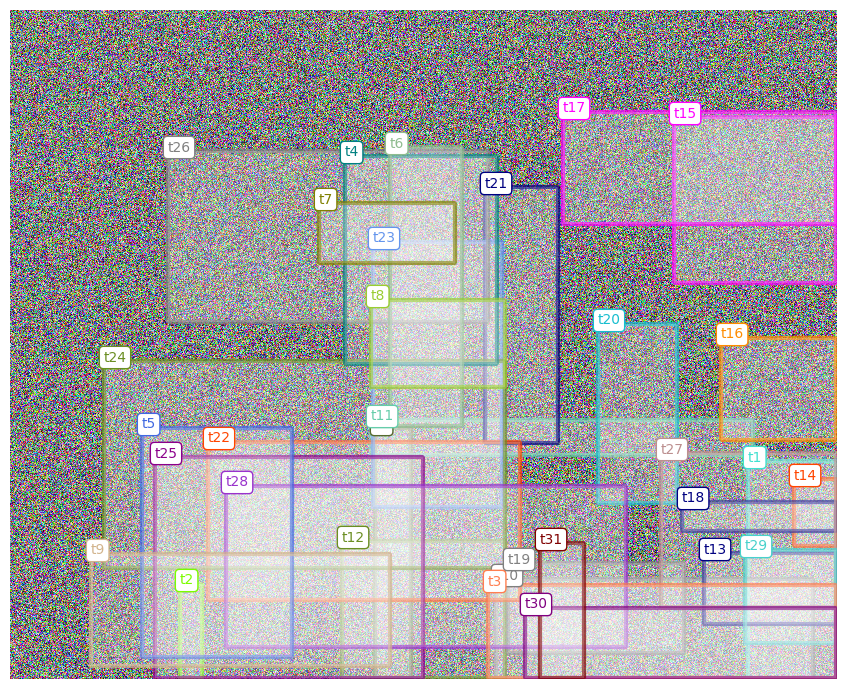

<vipy.image.scene: height=669, width=827, color=rgb, category="scene", objects=32>

In [6]:
# The scene can be indexed by frame, returning a vipy.image.Scene() object
# The image here is just uniform random noise for testing purposes
v[0].show()

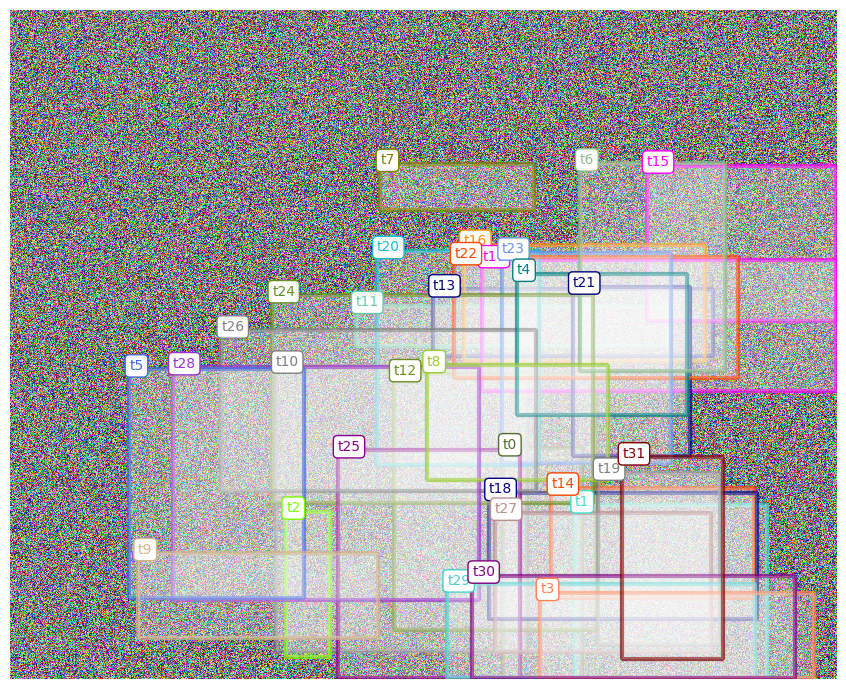

<vipy.image.scene: height=669, width=827, color=rgb, category="scene", objects=32>

In [7]:
# Frame 30 shows that the tracks are moving, this linearly interpolates the tracks at frame 30 
v[30].show()

In [8]:
# The scene can be iterated returning every frame in the video as a vipy.image.Scene() object
frames = [im for im in v]

In [9]:
# Activities can be iterated over to modify them in place by shifting them by 10 frames
v = v.activitymap(lambda a: a.offset(10))

In [10]:
# Activities can be filtered to remove them according to a property, such as minimum length of 10 frames
v = v.activityfilter(lambda a: len(a)>10)

In [11]:
# You can generate an annotation video for offline review
v = v.annotate().saveas('/tmp/myvideo.mp4')

[vipy.video.annotate]: Annotating video ...


In [12]:
# you can export the scene as a python dictionary for import into other tools
print(v.dict().keys())

dict_keys(['video', 'category', 'tracks', 'activities'])


In [13]:
# You can generate a list of clips for each activity which genenrates a vipy.video.Scene() object for each activity
A = v.activityclip()
print(A[0])

<vipy.video.scene: filename="/tmp/myvideo.mp4", clip=(60,111), category="activity5", objects=1, activities=1>


In [14]:
# You can generate activity cuboids for these activities which are defined as an activity cropped by the union of
# the object bounding boxes contributing to this activity.  Other options include activitytube() and activitysquare().
cuboid = A[0].activitycuboid(dilate=1.2)

# Then export these cuboids to torch tensors for training
t = cuboid.torch(startframe=0, length=16, stride=1, order='nchw', boundary='repeat')
print(t.shape)

torch.Size([16, 3, 256, 256])
